In [1]:
%run 2.Ecoli_model.ipynb

Putrescine
ptrc_p
Putrescine
ptrc_c
Putrescine
ptrc_e
9.564770642201834
N-Acetyl-L-glutamate 5-semialdehyde
acg5sa_c
N2-Succinyl-L-glutamate 5-semialdehyde
sucgsa_c
L-Glutamate 5-semialdehyde
glu5sa_c
Ornithine
orn_e
Ornithine
orn_p
Ornithine
orn_c
2-Oxoglutarate
akg_e
2-Oxoglutarate
akg_c
2-Oxoglutarate
akg_p
L-Glutamate 1-semialdehyde
glu1sa_c
L-Glutamate
glu__L_c
L-Glutamate 5-semialdehyde
glu5sa_c
L-Glutamate
glu__L_e
L-Glutamate
glu__L_p
L-Glutamate 5-phosphate
glu5p_c
glu5sa_c + glu__L_c --> akg_c + orn_c
53.02333333333343
45.78742857142842
9.929142857142859
L-Arginine
arg__L_c
L-Arginine
arg__L_e
L-Arginine
arg__L_p
Urea CH4N2O
urea_c
Urea CH4N2O
urea_p
Urea CH4N2O
urea_e
H2O H2O
h2o_p
H2O H2O
h2o_c
H2O H2O
h2o_e
arg__L_c + h2o_c --> orn_c + urea_c
9.929142857142859


## Phenotypic phase plane analysis

In [2]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope, add_envelope

{'EX_pi_e': 1000.0, 'EX_co2_e': 1000.0, 'EX_fe3_e': 1000.0, 'EX_h_e': 1000.0, 'EX_mn2_e': 1000.0, 'EX_fe2_e': 1000.0, 'EX_glc__D_e': 10.0, 'EX_zn2_e': 1000.0, 'EX_mg2_e': 1000.0, 'EX_ca2_e': 1000.0, 'EX_ni2_e': 1000.0, 'EX_cu2_e': 1000.0, 'EX_sel_e': 1000.0, 'EX_cobalt2_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_mobd_e': 1000.0, 'EX_so4_e': 1000.0, 'EX_nh4_e': 1000.0, 'EX_k_e': 1000.0, 'EX_na1_e': 1000.0, 'EX_cl_e': 1000.0, 'EX_o2_e': 1000.0, 'EX_tungs_e': 1000.0, 'EX_slnt_e': 1000.0}


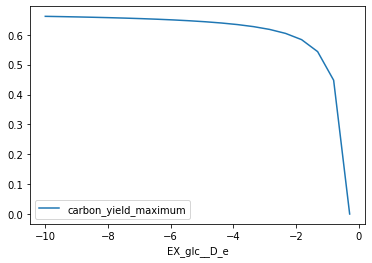

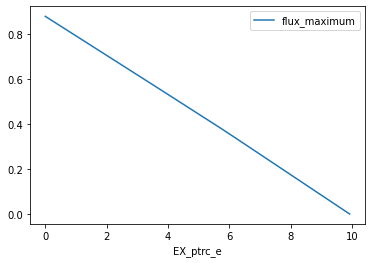

In [3]:
medium = model.medium
with model:
    model.medium = medium
    print(model.medium)
    model.objective = model.reactions.EX_ptrc_e
    put_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model,
                    reactions=[model.reactions.EX_ptrc_e],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
    ppp_PTRC = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.EX_ptrc_e)
    ppp_PTRC.plot(x='EX_glc__D_e', y='carbon_yield_maximum') #carbon yield of putrescine as function of glucose uptake
    ppp_BIOMASS.plot(x='EX_ptrc_e', y='flux_maximum') #carbon yield of biomass as function of glucose uptake

In [ ]:
ppp_BIOMASS = production_envelope(model,
                    reactions=[model.reactions.EX_ptrc_e],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
# This is putrescine production as a function of biomass

In [ ]:
ppp_BIOMASS

<AxesSubplot:xlabel='EX_ptrc_e'>

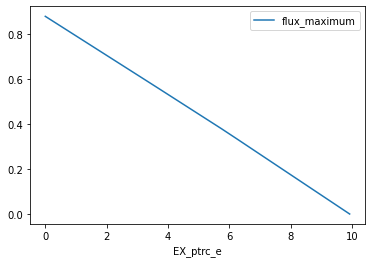

In [6]:
ppp_BIOMASS.plot(x='EX_ptrc_e', y='flux_maximum')

We observe that there is a linear correlation between biomass production and putrescine production. The more carbon goes to putrescine production, the less goes to biomass.

In [7]:
ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
# O2 consumption as a function of biomass

In [8]:
ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

-261.0526315789473

<AxesSubplot:xlabel='EX_o2_e'>

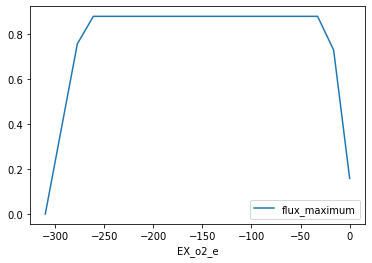

In [9]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum')

Grows very poorly when there is very little oxygen, grows well (high flux) with very high oxygen. 
Flux under the objective = biomass production is equal to growth rate

In [11]:
ppp_PTRC = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.EX_ptrc_e)

In [12]:
ppp_PTRC #max flux is production of putrescine

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,0.0,9.929143,0.661943,0.496950,-10.000000
1,EX_glc__D_e,0.0,0.0,0.0,9.408459,0.661005,0.496246,-9.489048
2,EX_glc__D_e,0.0,0.0,0.0,8.887774,0.659960,0.495461,-8.978096
3,EX_glc__D_e,0.0,0.0,0.0,8.367090,0.658789,0.494582,-8.467144
4,EX_glc__D_e,0.0,0.0,0.0,7.846406,0.657467,0.493590,-7.956193
5,EX_glc__D_e,0.0,0.0,0.0,7.325722,0.655965,0.492462,-7.445241
6,EX_glc__D_e,0.0,0.0,0.0,6.805037,0.654240,0.491167,-6.934289
7,EX_glc__D_e,0.0,0.0,0.0,6.284353,0.652242,0.489667,-6.423337
8,EX_glc__D_e,0.0,0.0,0.0,5.763669,0.649898,0.487907,-5.912385
9,EX_glc__D_e,0.0,0.0,0.0,5.242984,0.647110,0.485814,-5.401433


<AxesSubplot:xlabel='EX_glc__D_e'>

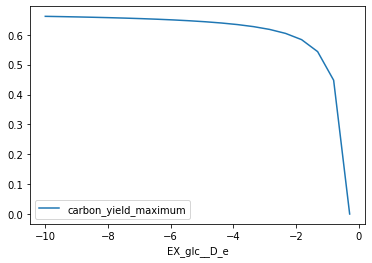

In [13]:
ppp_PTRC.plot(x='EX_glc__D_e', y='carbon_yield_maximum') #carbon yield of putrescine as function of glucose uptake

Here we see that the more glucose is consumed, we have a larger production of putrescine. When glucose exchange reaction nears zero, the putrescine production falls dramatically.

In [15]:
# Måske den her skal væk?
ppp_BIOMASS.plot(x='EX_glc__D_e', y='carbon_yield_maximum') #carbon yield of biomass as function of glucose uptake

KeyError: 'EX_glc__D_e'

<AxesSubplot:xlabel='EX_o2_e'>

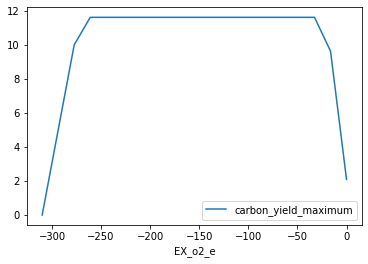

In [16]:
# Måske den her også skal væk
ppp_o2.plot(x='EX_o2_e', y='carbon_yield_maximum')

## Anaerobic environment

Now we try in an anaerobic environment to see if it gives different results

{'EX_pi_e': 1000.0, 'EX_co2_e': 1000.0, 'EX_fe3_e': 1000.0, 'EX_h_e': 1000.0, 'EX_mn2_e': 1000.0, 'EX_fe2_e': 1000.0, 'EX_glc__D_e': 10.0, 'EX_zn2_e': 1000.0, 'EX_mg2_e': 1000.0, 'EX_ca2_e': 1000.0, 'EX_ni2_e': 1000.0, 'EX_cu2_e': 1000.0, 'EX_sel_e': 1000.0, 'EX_cobalt2_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_mobd_e': 1000.0, 'EX_so4_e': 1000.0, 'EX_nh4_e': 1000.0, 'EX_k_e': 1000.0, 'EX_na1_e': 1000.0, 'EX_cl_e': 1000.0, 'EX_tungs_e': 1000.0, 'EX_slnt_e': 1000.0}


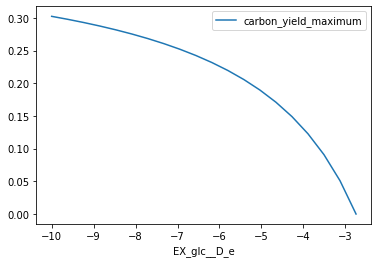

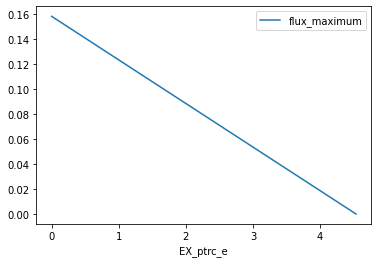

In [5]:
medium = model.medium
with model:
    medium['EX_o2_e'] = 0
    model.medium = medium
    print(model.medium)
    model.objective = model.reactions.EX_ptrc_e
    put_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model,
                    reactions=[model.reactions.EX_ptrc_e],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
    ppp_PTRC = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.EX_ptrc_e)
    ppp_PTRC.plot(x='EX_glc__D_e', y='carbon_yield_maximum') #carbon yield of putrescine as function of glucose uptake
    ppp_BIOMASS.plot(x='EX_ptrc_e', y='flux_maximum') #carbon yield of biomass as function of glucose uptake

In [ ]:
#Different carbon sources

In [ ]:
#prod_env = production_envelope(
    #model, ["EX_o2_e"], objective="EX_ac_e", carbon_sources="EX_glc__D_e")

#prod_env.plot(
    #kind='line', x='EX_o2_e', y='carbon_yield_maximum');
#Kom tilbage og kig på det her